In [2]:
import torch

In [75]:
import torch.nn as nn

In [177]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


****
##### Testing mha 

In [91]:
from mha import muliheaded_attention

In [92]:
testing_mha=muliheaded_attention(4,2)

In [93]:
## Checking the module list output. We based on the number of heads we pass, we will have that many linear layers.
testing_mha.q_mapping

ModuleList(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)

In [95]:
# A random tensor representing 1 image, 5 patches and embedding size of each patch to be 4
testing_tensor=torch.randn(2,5,4)
print(testing_tensor)
testing_mha(testing_tensor).shape

tensor([[[-0.2625,  0.2740, -0.2138,  0.6563],
         [ 0.2145, -0.5587,  0.0124,  0.6617],
         [ 1.4776,  0.0247,  0.1867,  0.4367],
         [-0.4658, -1.9022,  1.7393,  1.5262],
         [-0.6221, -0.2175,  0.5872, -0.6206]],

        [[ 0.1950,  0.6210, -1.5737,  1.7337],
         [-0.9654,  0.8480,  1.0328, -0.8368],
         [-1.5797, -1.4777,  0.1693,  0.0318],
         [ 0.4615,  1.2474,  0.1352,  0.2735],
         [-0.1720,  1.0442,  0.9636,  1.7562]]])
torch.Size([5, 4])
tensor([[-0.1146, -0.6354],
        [-0.0770, -0.6512],
        [ 0.1110, -0.7642],
        [-0.1764, -0.5866],
        [-0.1533, -0.6099]], grad_fn=<MmBackward0>)
tensor([[-1.2227, -0.0050],
        [-1.2072, -0.0021],
        [-1.1608,  0.0028],
        [-1.2190,  0.0178],
        [-1.0228,  0.0423]], grad_fn=<MmBackward0>)
torch.Size([5, 4])
tensor([[-0.4493, -0.4046],
        [-0.7134, -0.2643],
        [-0.5432, -0.3444],
        [-0.4751, -0.3930],
        [-0.5797, -0.3361]], grad_fn=<MmBackward

torch.Size([2, 5, 4])

### Output says that 2 heads will perform calculations on 5 patches where embedding size is 4. Since we have 2 heads, the embedding will be broken down into size of 2 and 2 for each head.

***

#### Testing out patchify function

In [189]:
from vit_model import patchify, ViT

# Simulating an input where we have 3 images, each has 3 color channels. Each image has shape 4,4
# testing_patchfy=torch.randn(3,3,4,4)
testing_patchfy=torch.randn(7,1,28,28)

# The output in this case implies, each image has been broken down into 4 patches. Each patch has embedding dim=12
patchify(testing_patchfy,7).shape

torch.Size([7, 49, 16])

***
#### Testing out Vit class

In [190]:
myvit=ViT()
# myvit(testing_patchfy).shape
re=myvit(testing_patchfy)

torch.Size([50, 8])
tensor([[-0.1042,  0.0213, -0.0196, -0.4416],
        [-0.0644,  0.0429, -0.0177, -0.4453],
        [ 0.0527,  0.0837,  0.1904, -0.4142],
        [ 0.0238,  0.0759,  0.0318, -0.4184],
        [ 0.0138, -0.0747,  0.1823, -0.4037],
        [-0.0231,  0.0446,  0.0946, -0.4402],
        [ 0.0071, -0.0646,  0.0976, -0.3896],
        [-0.0794,  0.0516, -0.0485, -0.4337],
        [ 0.0632,  0.0909,  0.0793, -0.4003],
        [ 0.0482,  0.0764,  0.0269, -0.3985],
        [ 0.0694, -0.0039,  0.1364, -0.3889],
        [ 0.0415, -0.0878,  0.2300, -0.3917],
        [ 0.0539, -0.0025,  0.2578, -0.4081],
        [ 0.0382,  0.0453,  0.1948, -0.3995],
        [ 0.0294,  0.0937,  0.1574, -0.4232],
        [ 0.1133,  0.0295,  0.2161, -0.3806],
        [ 0.0427,  0.0397,  0.2250, -0.4211],
        [ 0.0159, -0.0800,  0.1994, -0.4012],
        [ 0.0246, -0.0062,  0.2708, -0.4165],
        [ 0.0159,  0.0569,  0.1761, -0.4254],
        [ 0.1265,  0.0682,  0.2552, -0.3828],
        [ 0.06

In [193]:
re[0]

tensor(1., grad_fn=<SumBackward0>)

In [188]:
re[:,0,:]==re[:,0]

tensor([[True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True]])

In [148]:
re.shape

torch.Size([7, 50, 8])

In [135]:
(re.repeat(2,1,1))+torch.ones(2,50,16)

tensor([[[1.0000, 2.0000, 1.0000,  ..., 2.0000, 1.0000, 2.0000],
         [1.8415, 1.5403, 1.3110,  ..., 2.0000, 1.0003, 2.0000],
         [1.9093, 0.5839, 1.5911,  ..., 2.0000, 1.0006, 2.0000],
         ...,
         [1.1236, 0.0077, 1.7481,  ..., 1.9989, 1.0149, 1.9999],
         [0.2317, 0.3599, 1.5047,  ..., 1.9988, 1.0152, 1.9999],
         [0.0462, 1.3006, 1.2112,  ..., 1.9988, 1.0155, 1.9999]],

        [[1.0000, 2.0000, 1.0000,  ..., 2.0000, 1.0000, 2.0000],
         [1.8415, 1.5403, 1.3110,  ..., 2.0000, 1.0003, 2.0000],
         [1.9093, 0.5839, 1.5911,  ..., 2.0000, 1.0006, 2.0000],
         ...,
         [1.1236, 0.0077, 1.7481,  ..., 1.9989, 1.0149, 1.9999],
         [0.2317, 0.3599, 1.5047,  ..., 1.9988, 1.0152, 1.9999],
         [0.0462, 1.3006, 1.2112,  ..., 1.9988, 1.0155, 1.9999]]])

In [137]:
re.shape

torch.Size([50, 16])

In [136]:
torch.ones(2,50,16)

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [100]:
test_cls=nn.Parameter(torch.ones(1,16))

cls_input=[torch.cat((test_cls,p_s),dim=0) for p_s in re]
    

In [109]:
torch.stack(cls_input)[0].shape

torch.Size([50, 16])

In [102]:
len(cls_input)

7

In [103]:
myvit.patch_embedding_dim

16

****
#### Testing ViT encoder 

In [178]:
from vit_model import ViT_encoder

vit_encoder_test_tensor=torch.randn(7,50,8)
encoder=ViT_encoder(8)

In [172]:
res=encoder(vit_encoder_test_tensor)

torch.Size([50, 8])
tensor([[ 0.0614, -0.2315,  0.2421,  0.2252],
        [ 0.0338, -0.2609,  0.2729,  0.1586],
        [ 0.0439, -0.2551,  0.2680,  0.1903],
        [ 0.0686, -0.2216,  0.2189,  0.2124],
        [ 0.0923, -0.2126,  0.1935,  0.2544],
        [ 0.1068, -0.1805,  0.1785,  0.2998],
        [ 0.0887, -0.1926,  0.2195,  0.3156],
        [ 0.0891, -0.2062,  0.2067,  0.2639],
        [ 0.0878, -0.2034,  0.2109,  0.2776],
        [ 0.0712, -0.2254,  0.2305,  0.2465],
        [ 0.1245, -0.1704,  0.1477,  0.3108],
        [ 0.1541, -0.1388,  0.1145,  0.3663],
        [ 0.0761, -0.2052,  0.2124,  0.2320],
        [ 0.0877, -0.1987,  0.2043,  0.2654],
        [ 0.0280, -0.2684,  0.2813,  0.1463],
        [ 0.0243, -0.2630,  0.3040,  0.2014],
        [ 0.0833, -0.2170,  0.2049,  0.2389],
        [ 0.1123, -0.1630,  0.1706,  0.3254],
        [ 0.0856, -0.2180,  0.2079,  0.2429],
        [ 0.1056, -0.1907,  0.1545,  0.2405],
        [ 0.0444, -0.2410,  0.2541,  0.1785],
        [ 0.11

In [173]:
res.shape

torch.Size([7, 50, 8])

****
#### Inspecting the data



In [196]:
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor
transform = ToTensor()
train_set = MNIST(root='./../datasets', train=True, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./../datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./../datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./../datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./../datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./../datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./../datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./../datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./../datasets/MNIST/raw



In [212]:
test_set = MNIST(root='./../datasets', train=False, download=True, transform=transform)

In [214]:
test_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./../datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

In [201]:
import matplotlib.pyplot as plt

In [211]:
len(train_set)

60000

In [206]:
train_set[0][0].shape

torch.Size([1, 28, 28])

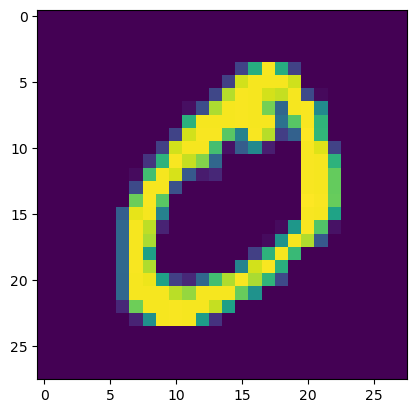

In [209]:
plt.imshow(train_set[1][0].permute(1,2,0))